### **Step 1: Import Libraries and Load Data**  
We need to import necessary libraries and load the MNIST dataset, which contains handwritten digit images.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


1. **Libraries:**
   - `tensorflow`: For creating and training the CNN.
   - `matplotlib.pyplot`: For visualizing data.

2. **Load Data:**  
   - `mnist.load_data()` loads the MNIST dataset.  
   - `train_images` and `train_labels`: Training data and labels.  
   - `test_images` and `test_labels`: Testing data and labels.  

3. **Check Shapes:**  
   - The dataset consists of 60,000 training and 10,000 testing samples, with images of size 28x28 pixels.

---

### **Step 2: Data Preprocessing**  

To train a CNN, we need to preprocess the MNIST data by:  
1. Reshaping the images to fit the input format of the CNN.  
2. Normalizing the pixel values to a range of 0 to 1.

In [4]:
# Reshape the images to (28, 28, 1) for CNN input
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

In [5]:
# Normalize the pixel values to range [0, 1]
train_images /= 255.0
test_images /= 255.0

In [6]:
print(f"Reshaped training images: {train_images.shape}")
print(f"Reshaped test images: {test_images.shape}")

Reshaped training images: (60000, 28, 28, 1)
Reshaped test images: (10000, 28, 28, 1)


1. **Reshaping:**  
   - CNNs expect input data to have a shape of `(number of samples, height, width, channels)`.  
   - Since MNIST images are grayscale, `channels=1`.  
   - We reshape the training and test images to `(28, 28, 1)`.

2. **Normalization:**  
   - Pixel values range from 0 to 255.  
   - Dividing by 255.0 scales the values to the range `[0, 1]`, improving training efficiency.

---

### **Step 3: Build the CNN Model**  

We will create a CNN model using TensorFlow's `Sequential` class and add layers using the `add` method.

In [12]:
from tensorflow.keras import models, layers

1. **Model Initialization:**  
   - We create a Sequential model using `models.Sequential()`.

In [13]:
# Initialize the CNN model
model = models.Sequential()

2. **Input Layer:**  
   - `layers.InputLayer(input_shape=(28, 28, 1))` defines the shape of input images explicitly.  
   - This is useful when separating model architecture from layers or when defining more complex models.

In [14]:
# Add the Input Layer
model.add(layers.InputLayer(input_shape=(28, 28, 1)))

3. **Convolutional Layers:**  
   - `Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))`:  
     - Adds a convolutional layer with 32 filters of size 3x3.  
     - `activation='relu'` introduces non-linearity.  
     - `input_shape=(28, 28, 1)` specifies input image size.  

In [16]:
# Add the first Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

4. **Pooling Layers:**  
   - `MaxPooling2D((2, 2))` reduces the size of feature maps by taking the maximum value in a 2x2 window, reducing computation and controlling overfitting.  

In [17]:
# Add a MaxPooling Layer
model.add(layers.MaxPooling2D((2, 2)))

In [18]:
# Add a second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
# Add another MaxPooling Layer
model.add(layers.MaxPooling2D((2, 2)))

In [20]:
# Add a third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

5. **Flatten Layer:**  
   - Converts the 2D feature maps into a 1D vector to input into the dense layers.

In [21]:
# Flatten the feature maps
model.add(layers.Flatten())

6. **Fully Connected Layer:**  
   - `Dense(64, activation='relu')` learns high-level features from the flattened input.  

In [22]:
# Add a Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

7. **Output Layer:**  
   - `Dense(10, activation='softmax')`: Produces 10 output classes (digits 0-9), with probabilities using the Softmax function.

In [23]:
# Add the Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [24]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,570 (400.66 KB)

 Trainable params: 102,570 (400.66 KB)

 Non-trainable params: 0 (0.00 B)

---

### **Step 4: Compile the Model**  

We need to compile the model before training it. During compilation, we specify:  

1. **Optimizer:** Controls how the model updates weights (we'll use `adam`).  
2. **Loss Function:** Measures how well the model performs (we'll use `sparse_categorical_crossentropy` since labels are integers).  
3. **Metrics:** Evaluates the model's performance during training (we'll use `accuracy`).

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


1. **Optimizer:**  
   - `adam` is an adaptive optimizer that adjusts the learning rate during training, making it efficient and widely used.

2. **Loss Function:**  
   - `sparse_categorical_crossentropy` compares predicted probabilities to true labels. It's used for multi-class classification where labels are integers.

3. **Metrics:**  
   - `accuracy` tracks the percentage of correctly classified images.

---

### **Step 5: Train the Model**  

We’ll train the CNN using the training dataset by:  

1. **Specifying Training Data:** Input images and corresponding labels.  
2. **Validation Data:** Use test data to evaluate the model during training.  
3. **Epochs:** Number of complete passes through the dataset (we’ll use 5).  
4. **Batch Size:** Number of samples processed before updating the model (we’ll use 64).  

---

In [27]:
history = model.fit(train_images, train_labels, 
                    epochs=5, 
                    batch_size=64, 
                    validation_data=(test_images, test_labels))

print("Model training complete.")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9742 - loss: 0.0817 - val_accuracy: 0.9898 - val_loss: 0.0316
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9903 - val_loss: 0.0311
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9923 - val_loss: 0.0241
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9947 - loss: 0.0169 - val_accuracy: 0.9917 - val_loss: 0.0299
Model training complete.


1. **Model Training:**  
   - `model.fit()` trains the CNN using the training dataset.  

2. **Parameters:**  
   - `train_images, train_labels`: Training data and labels.  
   - `epochs=5`: Model goes through the dataset 5 times.  
   - `batch_size=64`: Model processes 64 images at a time before updating.  
   - `validation_data=(test_images, test_labels)`: Evaluates performance on the test dataset after each epoch.

3. **Training Output:**  
   - The training process will display metrics like loss and accuracy for both training and validation sets.

---

### **Step 6: Evaluate the Model**  

After training, we’ll evaluate the model’s performance on the test dataset by checking its accuracy and loss.

In [28]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.9894 - loss: 0.0405
Test Accuracy: 99.17%
Test Loss: 0.0299


1. **Evaluation:**  
   - `model.evaluate()` calculates the model’s accuracy and loss on the test set.  

2. **Metrics Returned:**  
   - `test_loss`: The final loss on the test set.  
   - `test_accuracy`: The percentage of correctly classified test images.

---

### **Step 7: Visualize Training and Validation Loss**  

We’ll plot the training and validation loss over epochs to see how the model performed during training.

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_loss) + 1)

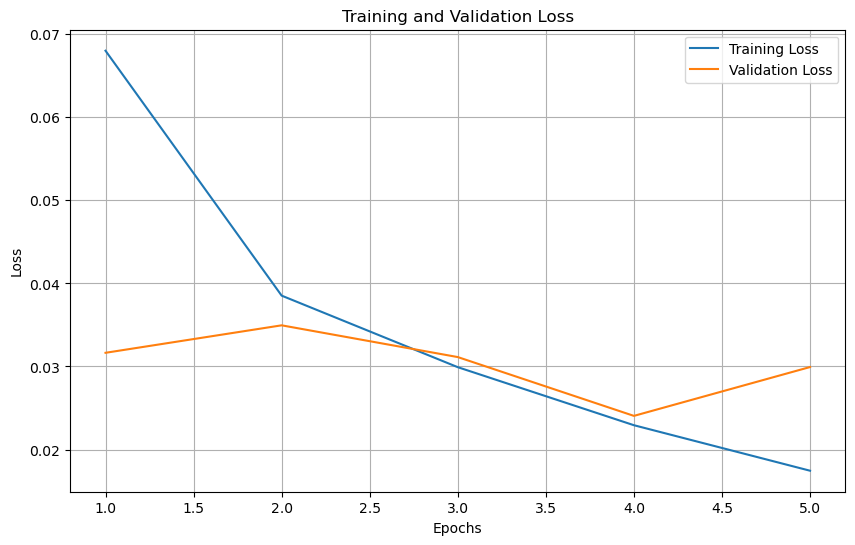

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

1. **Extract Loss Data:**  
   - `history.history['loss']`: Training loss after each epoch.  
   - `history.history['val_loss']`: Validation loss after each epoch.

2. **Plot the Loss:**  
   - Use `plt.plot()` to visualize the loss curves.  
   - Add labels, title, and a legend for clarity.  
   - Enable grid lines for better readability.

---

### **Step 9: Visualize Predictions**  

We’ll visualize some test images along with the model’s predictions to see how well the CNN performs.

In [29]:
import numpy as np

In [30]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [31]:
# Function to plot images and predictions

In [32]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {predicted_label} (True: {true_label})", color=color)

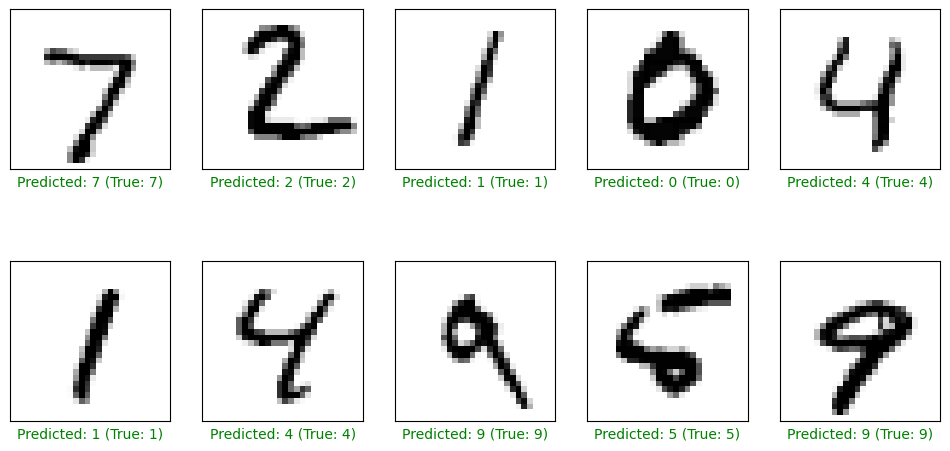

In [33]:
# Plot 10 test images with predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plot_image(i, predictions[i], test_labels[i], test_images[i])

plt.show()

1. **Predictions:**  
   - `model.predict(test_images)` returns probability distributions for each image.  

2. **Visualization:**  
   - We define a function `plot_image()` to display:  
     - Test image using `imshow()`.  
     - Predicted and true labels.  
     - Green text if the prediction is correct, red if incorrect.  

3. **Display:**  
   - The first 10 test images are displayed with predictions and true labels.

---

### **Visualizing CNN with CNN Explainer**  

The [CNN Explainer](https://poloclub.github.io/cnn-explainer/) is an interactive web-based tool that visually explains how a CNN works. It demonstrates key concepts like convolution, activation functions, pooling, and fully connected layers.

---

**How to Explore CNN Explainer:**  

1. **Open the Tool:**  
   - Visit [CNN Explainer](https://poloclub.github.io/cnn-explainer/) in your web browser.

2. **Explore the Sections:**  
   - **Input Layer:** Upload or use sample images to see how data enters the network.
   - **Convolutional Layer:** Watch how filters detect patterns like edges or textures.
   - **Activation Layer (ReLU):** See how negative values are removed to introduce non-linearity.
   - **Pooling Layer:** Observe how max pooling reduces spatial dimensions.
   - **Fully Connected Layer:** Understand how features are flattened and connected to output predictions.
   - **Output Layer:** See class predictions and confidence scores.

---